In [128]:
import pandas as pd

In [129]:
import os

In [130]:
os.chdir("C://Users//Devyani//Downloads")

In [131]:
df=pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [132]:
df.dtypes

population         float64
fertility          float64
HIV                float64
CO2                float64
BMI_male           float64
GDP                float64
BMI_female         float64
life               float64
child_mortality    float64
Region              object
dtype: object

In [133]:
import numpy as np

In [134]:
numdf=df.select_dtypes(include=np.number)

In [135]:
import seaborn as sb

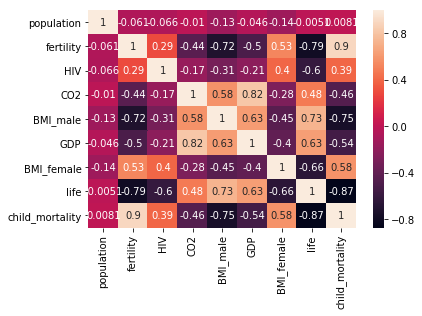

In [230]:
sb.heatmap(numdf.corr(),annot=True)

In [137]:
features_by_filter_method= ["HIV","GDP","BMI_female","child_mortality"]

In [138]:
X= df.drop(["life"],1)
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,East Asia & Pacific


In [139]:
y=df["life"]

In [140]:
X=pd.get_dummies(X)

In [141]:
col_names=list(X)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [142]:
x

array([[0.02885524, 0.22979398, 0.00154799, ..., 1.        , 0.        ,
        0.        ],
       [0.01634781, 0.81616482, 0.0750774 , ..., 0.        , 0.        ,
        1.        ],
       [0.03351002, 0.15213946, 0.01702786, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.07211944, 0.09191759, 0.01315789, ..., 0.        , 0.        ,
        0.        ],
       [0.01072639, 0.72900158, 0.52399381, ..., 0.        , 0.        ,
        1.        ],
       [0.01104464, 0.40729002, 0.58204334, ..., 0.        , 0.        ,
        1.        ]])

In [143]:
# pd.DataFrame(x)

In [144]:
X=pd.DataFrame(x)
X.columns= col_names
from sklearn.metrics import r2_score,mean_squared_error,median_absolute_error

In [145]:
from sklearn.model_selection import cross_val_score, GridSearchCV

In [146]:
from sklearn.neighbors import KNeighborsRegressor

In [147]:
knn=KNeighborsRegressor(n_neighbors=7)

In [148]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [149]:
X_test.shape

(28, 14)

In [150]:
#KNN
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

3.3720792350339215

In [151]:
r2_score(y_test,y_pred)

0.8297554764012687

In [152]:
#CROSSVALIDATION
knn=KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn,X,y,cv=10,scoring="r2")

array([0.73669977, 0.74702889, 0.62634816, 0.69099834, 0.6544671 ,
       0.81120102, 0.7446377 , 0.76684161, 0.90161633, 0.86892009])

In [153]:
#grid search cv
from sklearn.model_selection import GridSearchCV

In [154]:
params = {"n_neighbors":np.arange(1,16)}
params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}

In [155]:
knn = KNeighborsRegressor()
knn_cv = GridSearchCV(knn,param_grid=params, cv=10, scoring="r2")

In [156]:
knn_cv.fit(X,y)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [157]:
knn_cv.best_params_

{'n_neighbors': 4}

In [158]:
knn_cv.best_score_

0.7574880832829246

In [159]:
best_model=knn_cv.best_estimator_

In [160]:
#CROSSVALIDATION WITH FEATURE SELECTION 

X=X[features_by_filter_method]

In [161]:
X.head()

,HIV,GDP,BMI_female,child_mortality
0,0.001548,0.093443,0.691602,0.141574
1,0.075077,0.051917,0.703734,1.000000
2,0.017028,0.112027,0.083681,0.067089
3,0.001548,0.054149,0.852002,0.091389
4,0.001548,0.324525,0.000000,0.013207


In [162]:
knn=KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn,X,y,cv=10,scoring="r2")

array([0.71888138, 0.77033748, 0.81859797, 0.86993876, 0.7996056 ,
       0.93679441, 0.80748707, 0.79509941, 0.9218453 , 0.8921665 ])

In [163]:
knn_cv.best_score_

0.7574880832829246

In [164]:
params = {"n_neighbors":np.arange(1,16)}
params

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])}

In [165]:
knn_cv = GridSearchCV(knn,param_grid=params, cv=10, scoring="r2")

In [166]:
knn_cv.fit(X,y)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=None, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [167]:
knn_cv.best_score_

0.8552926402152244

In [202]:
dfcat=pd.read_csv("gapminder.csv")
dfcat.head()
X= df.drop(["life"],1)
X.head()
y=df["life"]
X=pd.get_dummies(X)
col_names=list(X)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(X)
X=pd.DataFrame(x)
X.columns= col_names
# WITH CATEGORICAL COLUMNS
categorical=list(X)[-6:]

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [203]:
X_CAT=X[categorical]
X_CAT

,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa
0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,1.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0


In [204]:
X_num=X[features_by_filter_method]

In [205]:
X=pd.concat([X_CAT,X_num],1)
X

,Region_America,Region_East Asia & Pacific,Region_Europe & Central Asia,Region_Middle East & North Africa,Region_South Asia,Region_Sub-Saharan Africa,HIV,GDP,BMI_female,child_mortality
0,0.0,0.0,0.0,1.0,0.0,0.0,0.001548,0.093443,0.691602,0.141574
1,0.0,0.0,0.0,0.0,0.0,1.0,0.075077,0.051917,0.703734,1.000000
2,1.0,0.0,0.0,0.0,0.0,0.0,0.017028,0.112027,0.083681,0.067089
3,0.0,0.0,1.0,0.0,0.0,0.0,0.001548,0.054149,0.852002,0.091389
4,0.0,1.0,0.0,0.0,0.0,0.0,0.001548,0.324525,0.000000,0.013207
5,0.0,0.0,1.0,0.0,0.0,0.0,0.009288,0.345563,0.373356,0.010037
6,0.0,0.0,1.0,0.0,0.0,0.0,0.001548,0.109787,0.619706,0.214474
7,1.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.189540,0.386979,0.062335
8,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.013364,0.422554,0.281035
9,1.0,0.0,0.0,0.0,0.0,0.0,0.047988,0.123414,0.497806,0.067089


In [206]:
knn=KNeighborsRegressor(n_neighbors=5)
cross_val_score(knn,X,y,cv=10,scoring="r2")

array([0.8211049 , 0.74757598, 0.64555004, 0.7049268 , 0.73794806,
       0.80134007, 0.82241066, 0.72112503, 0.90571085, 0.87873789])

In [207]:
df=pd.read_csv("gapminder.csv")
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [208]:
X= df.drop(["life"],1)
X.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,5.2,East Asia & Pacific


In [209]:
y=df["life"]

In [210]:
X=pd.get_dummies(X)

In [211]:
col_names=list(X)
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(X)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [212]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.028855,0.229794,0.001548,0.068188,0.520969,0.093443,0.691602,0.141574,0.0,0.0,0.0,1.0,0.0,0.0
1,0.016348,0.816165,0.075077,0.030101,0.229964,0.051917,0.703734,1.000000,0.0,0.0,0.0,0.0,0.0,1.0
2,0.033510,0.152139,0.017028,0.098094,0.881472,0.112027,0.083681,0.067089,1.0,0.0,0.0,0.0,0.0,0.0
3,0.002254,0.019017,0.001548,0.036873,0.615170,0.054149,0.852002,0.091389,0.0,0.0,1.0,0.0,0.0,0.0
4,0.017625,0.107765,0.001548,0.369818,0.889169,0.324525,0.000000,0.013207,0.0,1.0,0.0,0.0,0.0,0.0
5,0.006730,0.020602,0.009288,0.167878,0.753142,0.345563,0.373356,0.010037,0.0,0.0,1.0,0.0,0.0,0.0
6,0.007179,0.112520,0.001548,0.104756,0.651866,0.109787,0.619706,0.214474,0.0,0.0,1.0,0.0,0.0,0.0
7,0.000060,0.096672,0.117647,0.064142,0.849739,0.189540,0.386979,0.062335,1.0,0.0,0.0,0.0,0.0,0.0
8,0.123643,0.174326,0.000000,0.006378,0.000000,0.013364,0.422554,0.281035,0.0,0.0,0.0,0.0,1.0,0.0
9,0.000000,0.087163,0.047988,0.123213,0.742841,0.123414,0.497806,0.067089,1.0,0.0,0.0,0.0,0.0,0.0


In [213]:
X=pd.DataFrame(x)
X.columns= col_names

In [214]:
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=42)

In [215]:
from sklearn.linear_model import LinearRegression,RidgeCV,LassoCV,ElasticNetCV
lin_reg=LinearRegression()

In [216]:
lin_reg.fit(X_train,y_train)
y_pred= lin_reg.predict(X_test)
r2_score(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))

2.346972417900389

In [217]:
cross_val_score(lin_reg,X,y,cv=10)

array([0.7167508 , 0.80157728, 0.81668174, 0.82942625, 0.7418073 ,
       0.93913741, 0.83464389, 0.80949561, 0.95082034, 0.94307859])

In [218]:
ridge=RidgeCV(alphas=np.arange(0.1,2,0.1))

In [219]:
ridge.fit(X,y)

RidgeCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [220]:
ridge.score(X,y)

0.9031834826223613

In [221]:
ridge.coef_

array([ -2.39339187,  -5.56818862, -15.28738576,  -5.92156909,
         1.62068847,  13.29556017,  -6.68282981, -15.77543287,
         0.06248054,  -2.29506367,   0.11439989,   1.39729797,
        -0.05554385,   0.77642913])

In [222]:
lin_reg.score(X,y)

0.904273251454374

In [223]:
lasso=LassoCV(alphas=np.arange(0.1,2,0.1))

In [224]:
lasso.fit(X,y)

C:\Users\Devyani\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LassoCV(alphas=array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
    copy_X=True, cv='warn', eps=0.001, fit_intercept=True, max_iter=1000,
    n_alphas=100, n_jobs=None, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [228]:
lasso.score(X,y)

0.8825658083305495